In [269]:
using ForwardDiff
using Plots
using Pkg
Pkg.add("LaTeXStrings")
using LaTeXStrings
using SymPy
gr()

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


Plots.GRBackend()

### Ejercicio 1

In [2]:
A = randn(20);

In [3]:
B = sort(A);

In [4]:
C = reverse(B);

### Ejercicio 2 

In [5]:
function derivada(f,x)                  #Definimos una función usando la paquetería ForwardDiff para derivar.
    ForwardDiff.derivative(f,x)
end
x1 = -5.0:0.01:5
A = 5^2
N_Eigenvalores = 10
X = zeros(N_Eigenvalores)
Y = zeros(2*N_Eigenvalores);
length(Y)

20

In [9]:
function f(x)
    if A - x^2 < 0
        return NaN  # Devuelve NaN si la raíz es negativa
    else
        return x * tan(x) - sqrt(A - x^2)
    end
end

f (generic function with 1 method)

In [10]:
for i_eigen in 1:N_Eigenvalores 
    contador = 0
    n = 200 #IteracionesMax
    tol = 0.00001 #Tolerancia 
    k = 0 # Para iterar
    x = 1.5*i_eigen #First Guess 
    F = f(x) # Función evaluada en el First Guess
    
    if abs(F) < tol 
        print("La raíz es $x")
    else 
        while tol < abs(F) && k < n
            xi = x - f(x)/derivada(f,x)
            x = xi
            F = f(x)
            k = k+1
        end
        if abs(F) > tol
            print("No se pudo encontrar la raíz en $n iteraciones")
        else
            print("La raíz es $x, raíz encontrada en $k iteraciones")
            X[i_eigen] = x
        end
    end 
    contador = contador + 1
end

La raíz es 1.3064400087480297, raíz encontrada en 6 iteracionesLa raíz es 3.83746718216645, raíz encontrada en 5 iteracionesLa raíz es 3.8374671066221775, raíz encontrada en 6 iteracionesLa raíz es 6.0, raíz encontrada en 0 iteracionesLa raíz es 7.5, raíz encontrada en 0 iteracionesLa raíz es 9.0, raíz encontrada en 0 iteracionesLa raíz es 10.5, raíz encontrada en 0 iteracionesLa raíz es 12.0, raíz encontrada en 0 iteracionesLa raíz es 13.5, raíz encontrada en 0 iteracionesLa raíz es 15.0, raíz encontrada en 0 iteraciones

In [13]:
X1 = -reverse(X)
X2 = vcat(X1,X);

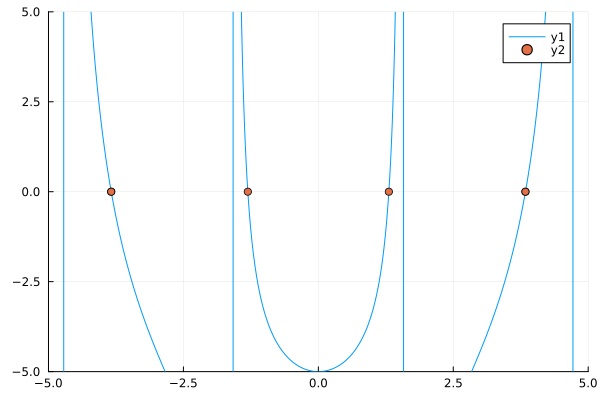

In [12]:
plot(x1,f,xlims = (-5,5),ylims=(-5,5))
scatter!(X2,Y)

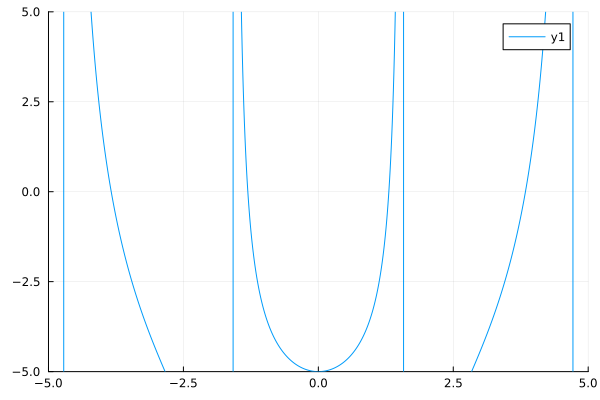

In [123]:
plot(x1,f,xlims = (-5,5), ylims = (-5,5))

### Ejercicio 3

Crear una rutina que busque raíces de cualquier función, usando Newton. Usar derivada numérica.
Probar con distintas funciones, por ejemplo $x^2-4$ 
Analizar la convergencia para distintas condiciones iniciales.
Graficar en cuántos pasos se llega a la raíz


Diferencia Finita Progresiva 

$h = \Delta x = x_{k+1}-x_k$

### $f^\prime(x_k) \approx \frac{f(x_{k+1})-f(x_k)}{h}$

Diferencia Finita Regresiva

### $f^\prime(x_k) \approx \frac{f(x_{k})-f(x_{k-1})}{h}$

In [66]:
# Buscamos definir una derivada mediante diferencias finitas entonces
function difprog(f1,x_k)
       x_k1 = x_k +c
       h = x_k1-x_k 
       return (f1(x_k1)-f1(x_k))/h
end

difprog (generic function with 2 methods)

In [67]:
f1(x) = x^2-4

f1 (generic function with 1 method)

In [68]:
difprog(f1,2)

4.009999999999977

In [69]:
function difreg(f1,x_k)
       x_k1 = x_k -c
       h = x_k1-x_k 
       return (f1(x_k1)-f1(x_k))/h
end

difreg (generic function with 1 method)

In [70]:
difreg(f1,2)

3.989999999999979

In [ ]:
N1 = 10 # Precisión de la derivada
K = zeros(N1);
for i in 1:N1
    contador = 0
    n = 200 #IteracionesMax
    tol = 0.000001 #Tolerancia 
    k = 0 # Para iterar
    x = 1.5 #First Guess 
    F1 = f1(x) # Función evaluada en el First Guess
    c = 10.0^(-i) #Precisión de delta x
    
    if abs(F1) < tol 
        print("La raíz es $x")
    else 
        while tol < abs(F1) && k < n
            xi = x - f1(x)/difprog(f1,x)
            x = xi
            F1 = f1(x)
            k = k+1
        end
        if abs(F1) > tol
            print("No se pudo encontrar la raíz en $n iteraciones")
        else
            print("La raíz es $x, raíz encontrada en $k iteraciones")
            K[i] = k
        end
    end 
    contador = contador + 1
end

La raíz es 2.0000000373063958, raíz encontrada en 5 iteracionesLa raíz es 2.000000013058585, raíz encontrada en 4 iteracionesLa raíz es 2.0000000002809597, raíz encontrada en 4 iteracionesLa raíz es 2.000000000018548, raíz encontrada en 4 iteracionesLa raíz es 2.000000000001867, raíz encontrada en 4 iteracionesLa raíz es 2.000000000000294, raíz encontrada en 4 iteracionesLa raíz es 2.0000000000001386, raíz encontrada en 4 iteracionesLa raíz es 2.000000000000126, raíz encontrada en 4 iteracionesLa raíz es 2.000000000000188, raíz encontrada en 4 iteracionesLa raíz es 1.9999999999998788, raíz encontrada en 4 iteraciones

In [135]:
v = collect(1:N1)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

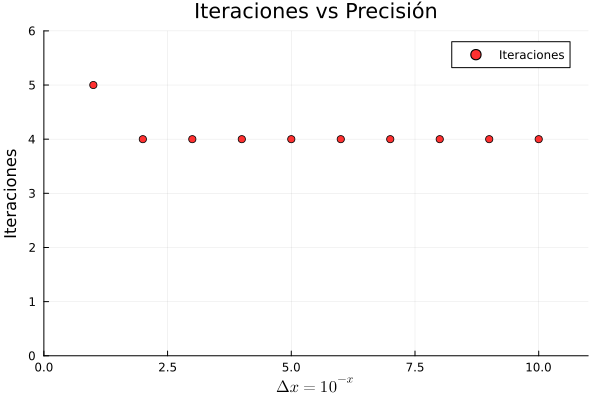

In [144]:
scatter(v,K, xlims=(0,11), ylims=(0,6), xlabel=latexstring("\\Delta x = 10^{-x}"), ylabel = "Iteraciones", 
    label = "Iteraciones", title = "Iteraciones vs Precisión", color = "firebrick1")

In [148]:
K1 = zeros(N1);
for i in 1:N1
    contador = 0
    n = 200 #IteracionesMax
    tol = 0.000001 #Tolerancia 
    k = 0 # Para iterar
    x = 1.5 #First Guess 
    F1 = f1(x) # Función evaluada en el First Guess
    c = 10.0^(-i) #Precisión de delta x
    
    if abs(F1) < tol 
        print("La raíz es $x")
    else 
        while tol < abs(F1) && k < n
            xi = x - f1(x)/difreg(f1,x)
            x = xi
            F1 = f1(x)
            k = k+1
        end
        if abs(F1) > tol
            print("No se pudo encontrar la raíz en $n iteraciones")
        else
            print("La raíz es $x, raíz encontrada en $k iteraciones")
            K1[i] = k
        end
    end 
    contador = contador + 1
end

La raíz es 2.0000000570552627, raíz encontrada en 4 iteracionesLa raíz es 2.0000000081938496, raíz encontrada en 4 iteracionesLa raíz es 1.9999999999323392, raíz encontrada en 4 iteracionesLa raíz es 1.9999999999838234, raíz encontrada en 4 iteracionesLa raíz es 1.999999999998395, raíz encontrada en 4 iteracionesLa raíz es 1.999999999999947, raíz encontrada en 4 iteracionesLa raíz es 2.000000000000103, raíz encontrada en 4 iteracionesLa raíz es 2.0000000000001106, raíz encontrada en 4 iteracionesLa raíz es 2.0000000000000338, raíz encontrada en 4 iteracionesLa raíz es 1.99999999999988, raíz encontrada en 4 iteraciones

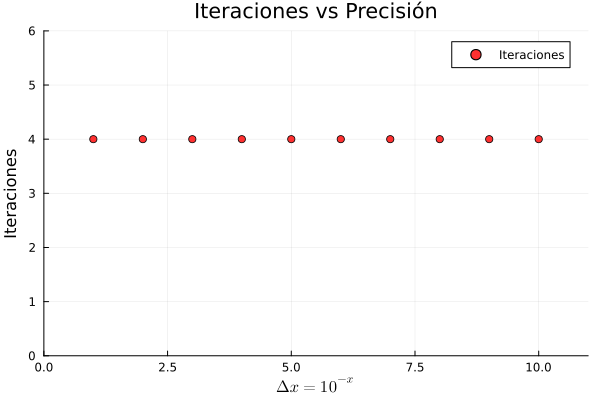

In [149]:
scatter(v,K1, xlims=(0,11), ylims=(0,6), xlabel=latexstring("\\Delta x = 10^{-x}"), ylabel = "Iteraciones", 
    label = "Iteraciones", title = "Iteraciones vs Precisión", color = "firebrick1")

En este caso observamos un poco mejor de precisión para la derivada regresiva que la progresiva en el primer intento con $\Delta x = 10^{-1}$

### Ejercicio 4

Sustituir la diferencia finita por $\Delta x = x_n - x_{n-1}$

Comparar la convergencia con el método de Newton

In [163]:
k = 0 # Para iterar 
x = 1.5 #First Guess
F1 = f1(x) # Función evaluada en el First Guess
c1 = 0.1

if F1 == 0 
    print("La raíz es $x")
else 
    while tol < abs(F1) && k < n
        xi = x - f1(x)/(x-c1)
        x = xi
        F1 = f1(x)
        k = k+1
        #println("$k")
        #println("$x")
    end
    if abs(F1) > tol
        print("No se pudo encontrar la raíz en $n iteraciones")
    else
        print("La raíz es $x, raíz encontrada en $k iteraciones")
    end
end 

La raíz es -1.99999976957003, raíz encontrada en 186 iteraciones

In [164]:
# 186 itereaciones


200